# IPL Analysis

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math

In [2]:
ipl = pd.read_csv("E:\matches.csv")

In [3]:
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,04-05-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,04-06-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,04-07-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,04-08-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,04-08-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
ipl.describe()

,id,season,dl_applied,win_by_runs,win_by_wickets
count,762.000000,762.000000,762.000000,762.000000,762.000000
mean,1867.976378,2013.496063,0.024934,13.404199,3.330709
std,3554.270099,3.403347,0.156028,23.620118,3.385961
min,1.000000,2008.000000,0.000000,0.000000,0.000000
25%,191.250000,2011.000000,0.000000,0.000000,0.000000
50%,381.500000,2013.000000,0.000000,0.000000,3.000000
75%,571.750000,2016.000000,0.000000,19.000000,6.000000
max,11421.000000,2020.000000,1.000000,146.000000,10.000000


In [5]:
ipl.shape

(762, 18)

In [6]:
ipl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 762 entries, 0 to 761
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               762 non-null    int64 
 1   season           762 non-null    int64 
 2   city             762 non-null    object
 3   date             762 non-null    object
 4   team1            762 non-null    object
 5   team2            762 non-null    object
 6   toss_winner      762 non-null    object
 7   toss_decision    762 non-null    object
 8   result           762 non-null    object
 9   dl_applied       762 non-null    int64 
 10  winner           762 non-null    object
 11  win_by_runs      762 non-null    int64 
 12  win_by_wickets   762 non-null    int64 
 13  player_of_match  762 non-null    object
 14  venue            762 non-null    object
 15  umpire1          760 non-null    object
 16  umpire2          760 non-null    object
 17  umpire3          125 non-null    ob

In [7]:
c_teams = ['Kolkata Knight Riders', 'Chennai Super Kings', 'Rajasthan Royals',
                    'Mumbai Indians', 'Kings XI Punjab', 'Royal Challengers Bangalore',
                    'Delhi Capitals', 'Sunrisers Hyderabad']

In [8]:
ipl = ipl[(ipl['team1'].isin(c_teams)) & (ipl['team2'].isin(c_teams))]
ipl.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,04-05-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
6,7,2017,Mumbai,04-09-2017,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,N Rana,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
7,8,2017,Indore,04-10-2017,Royal Challengers Bangalore,Kings XI Punjab,Royal Challengers Bangalore,bat,normal,0,Kings XI Punjab,0,8,AR Patel,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
9,10,2017,Mumbai,04-12-2017,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,4,JJ Bumrah,Wankhede Stadium,Nitin Menon,CK Nandan,NaN
10,11,2017,Kolkata,4/13/2017,Kings XI Punjab,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,8,SP Narine,Eden Gardens,A Deshmukh,NJ Llong,NaN


In [9]:
win_by_runs_d = ipl[ipl['win_by_runs']>0].win_by_runs
print(f"Number of rows = {len(win_by_runs_d)}")
win_by_runs_d.head()

Number of rows = 197


0     35
13    17
18     5
26    82
31    26
Name: win_by_runs, dtype: int64

In [10]:
ipl['win_by_runs'].mean()

13.875846501128668

In [11]:
win_by_runs_d.mean()

31.20304568527919

In [12]:
win_by_runs_d.median()

23.0

In [13]:
win_by_runs_10 = list(win_by_runs_d[:10])
print(win_by_runs_10)
print(sorted(win_by_runs_10))

[35, 17, 5, 82, 26, 48, 19, 14, 7, 9]
[5, 7, 9, 14, 17, 19, 26, 35, 48, 82]


In [14]:
win_by_runs_d.mode()

0    14
dtype: int64

In [15]:
win_max = win_by_runs_d.max()
win_min = win_by_runs_d.min()
win_range = win_max - win_min

print(f'Largest = {win_max}, Smallest = {win_min}, Range = {win_range}')

Largest = 140, Smallest = 1, Range = 139


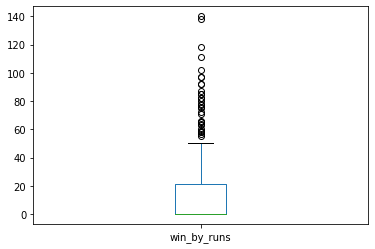

In [16]:
ipl["win_by_runs"].plot(kind = 'box')

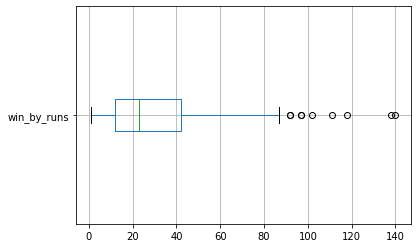

In [17]:
win_by_runs_d.to_frame().boxplot(vert=False)

# Total no. of wins by each team

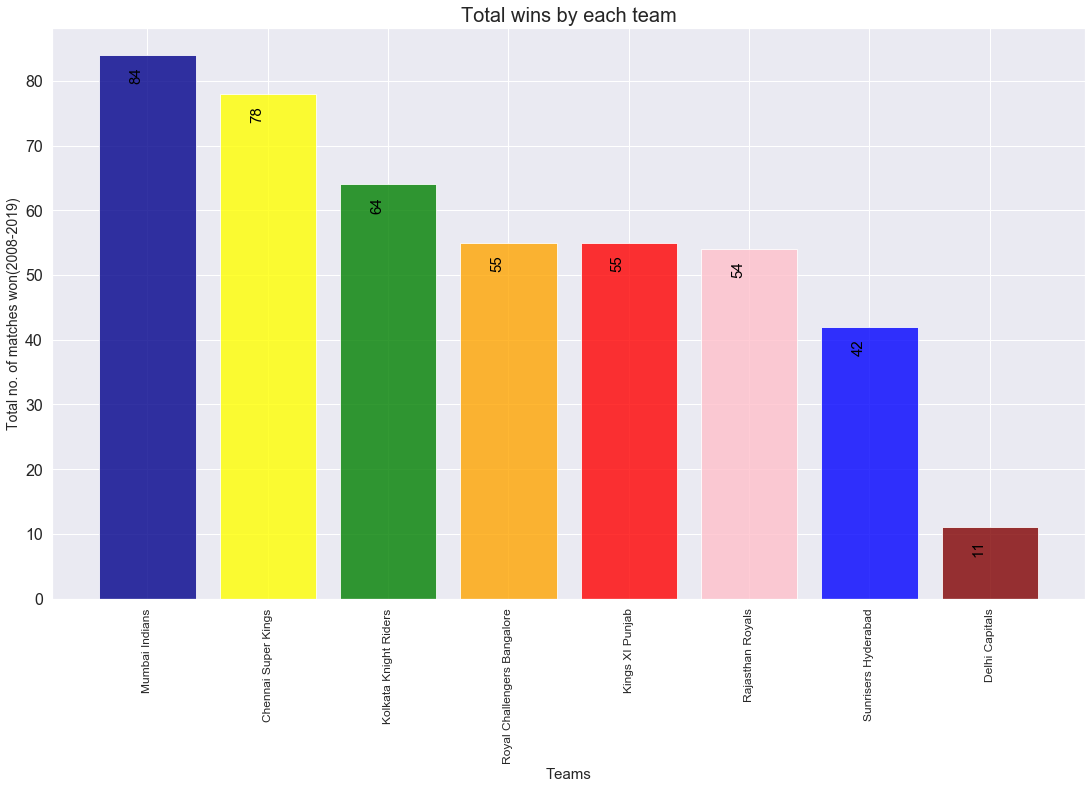

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'darkgrid')
fig = plt.gcf()
fig.set_size_inches(18.5,10.5)
wins=pd.DataFrame(ipl['winner'].value_counts())
wins['name']=wins.index
plt.xticks(rotation=90,fontsize=12)
plt.yticks(fontsize=16)
plt.bar(wins['name'],
       wins['winner'],
       color=['darkblue','yellow','green','orange','red','pink','blue','maroon','brown','lightgreen','skyblue','pink','blue','green','purple'],
       alpha= 0.8)
count = 0
for i in wins['winner']:
    plt.text(count-0.15,i-4,str(i),size=15,color='black',rotation=90)
    count+=1
plt.title('Total wins by each team',fontsize=20)
plt.xlabel('Teams',fontsize=15)
plt.ylabel('Total no. of matches won(2008-2019)',fontsize=14)
plt.show()

 #          Top 20 players 

In [19]:
n_top = 30
players = pd.DataFrame(ipl['player_of_match'].value_counts(3))
players['name']=players.index
players=players.head(n_top)
players

,player_of_match,name
CH Gayle,0.033860,CH Gayle
RG Sharma,0.024831,RG Sharma
SR Watson,0.024831,SR Watson
DA Warner,0.024831,DA Warner
AD Russell,0.022573,AD Russell
MS Dhoni,0.022573,MS Dhoni
AB de Villiers,0.020316,AB de Villiers
SK Raina,0.020316,SK Raina
KA Pollard,0.020316,KA Pollard
MEK Hussey,0.020316,MEK Hussey


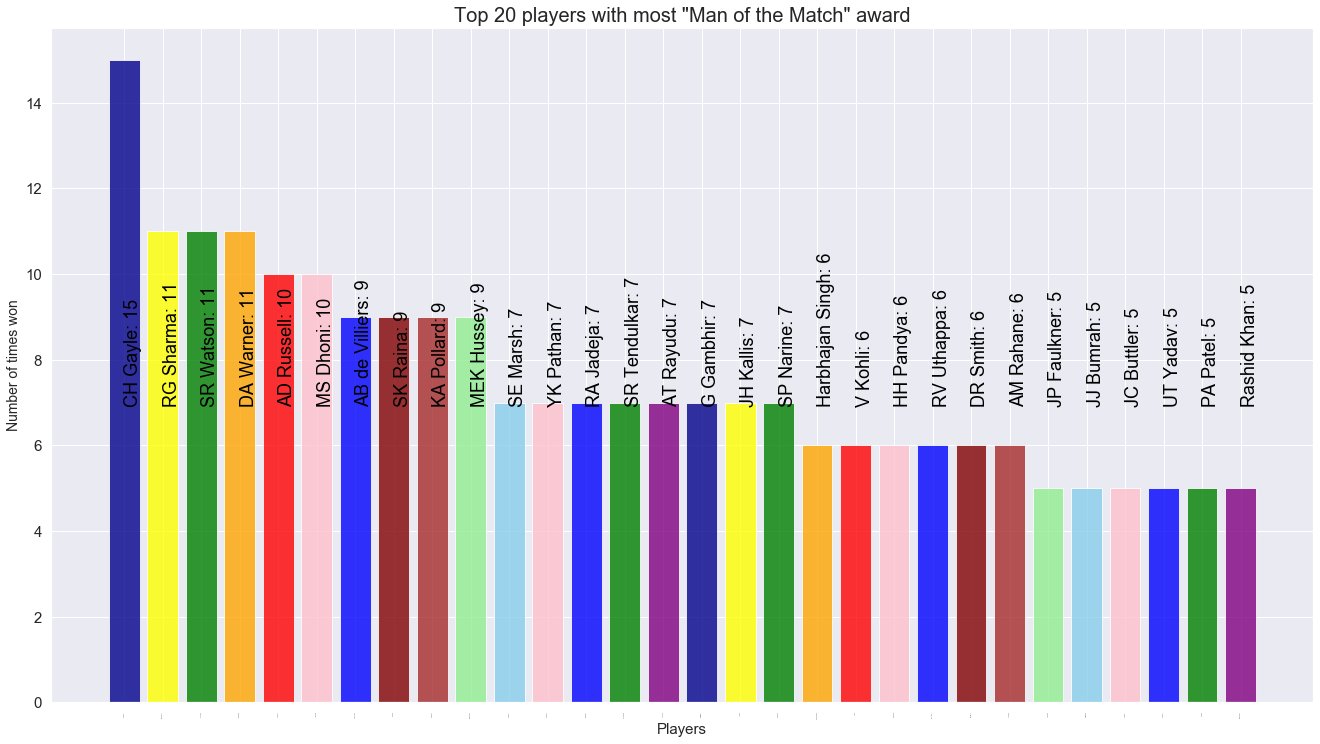

In [20]:
n_top = 30
players = pd.DataFrame(ipl['player_of_match'].value_counts())
players['name']=players.index
players=players.head(n_top)
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.xticks(rotation=90,fontsize=0)
plt.yticks([0,2,4,6,8,10,12,14,16,18,20],[0,2,4,6,8,10,12,14,16,18,20],fontsize=15)
plt.bar(players['name'], players['player_of_match'],
       color=['darkblue','yellow','green','orange','red','pink','blue','maroon','brown','lightgreen','skyblue','pink','blue','green','purple'],
       alpha= 0.8)
count=0
for i in players['player_of_match']:
    plt.text(count,7,players['name'][count]+': '+str(i),rotation=90,color='black',size=18)
    count+=1
plt.title('Top 20 players with most "Man of the Match" award',fontsize=20)
plt.xlabel('Players',fontsize=15)
plt.ylabel('Number of times won',fontsize=14)
plt.tight_layout()
plt.show()    

# Matches hosted in each cities

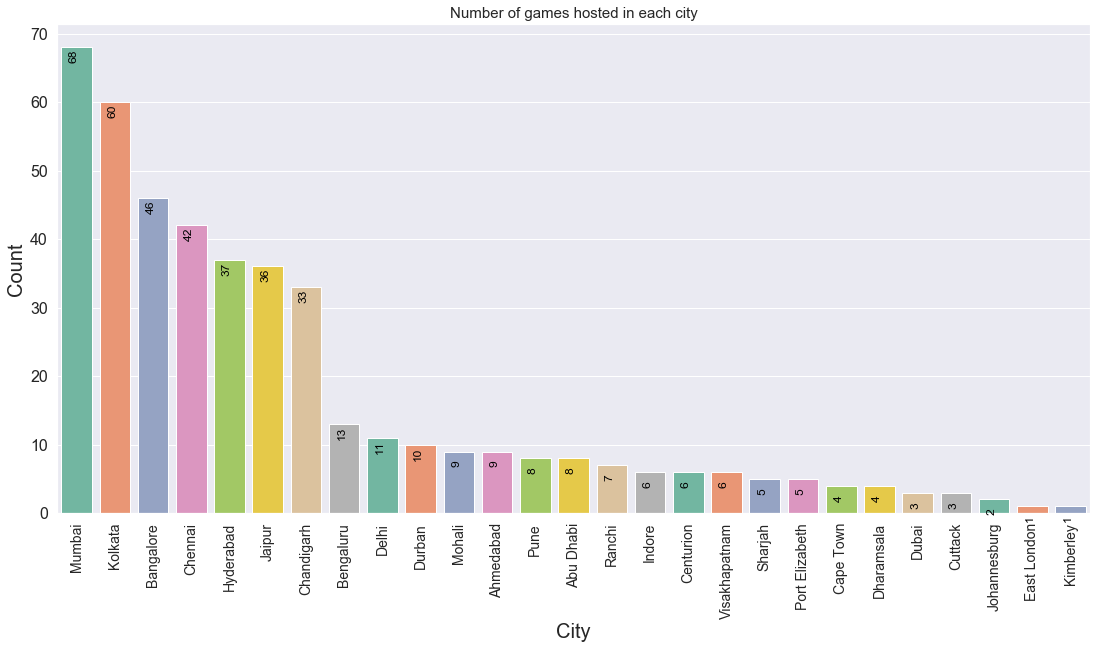

In [21]:
fig=plt.gcf()
fig.set_size_inches(18.5,9)
sns.countplot(ipl['city'],order=ipl['city'].value_counts().index,palette='Set2')
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=16)
plt.xlabel('City',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Number of games hosted in each city',fontsize=15)
count=0
cities=pd.DataFrame(ipl['city'].value_counts())
cities['names']=ipl['city'].value_counts().index
for i in cities['city']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=12)
    count+=1
plt.show()    

# Number of matches at each stadium

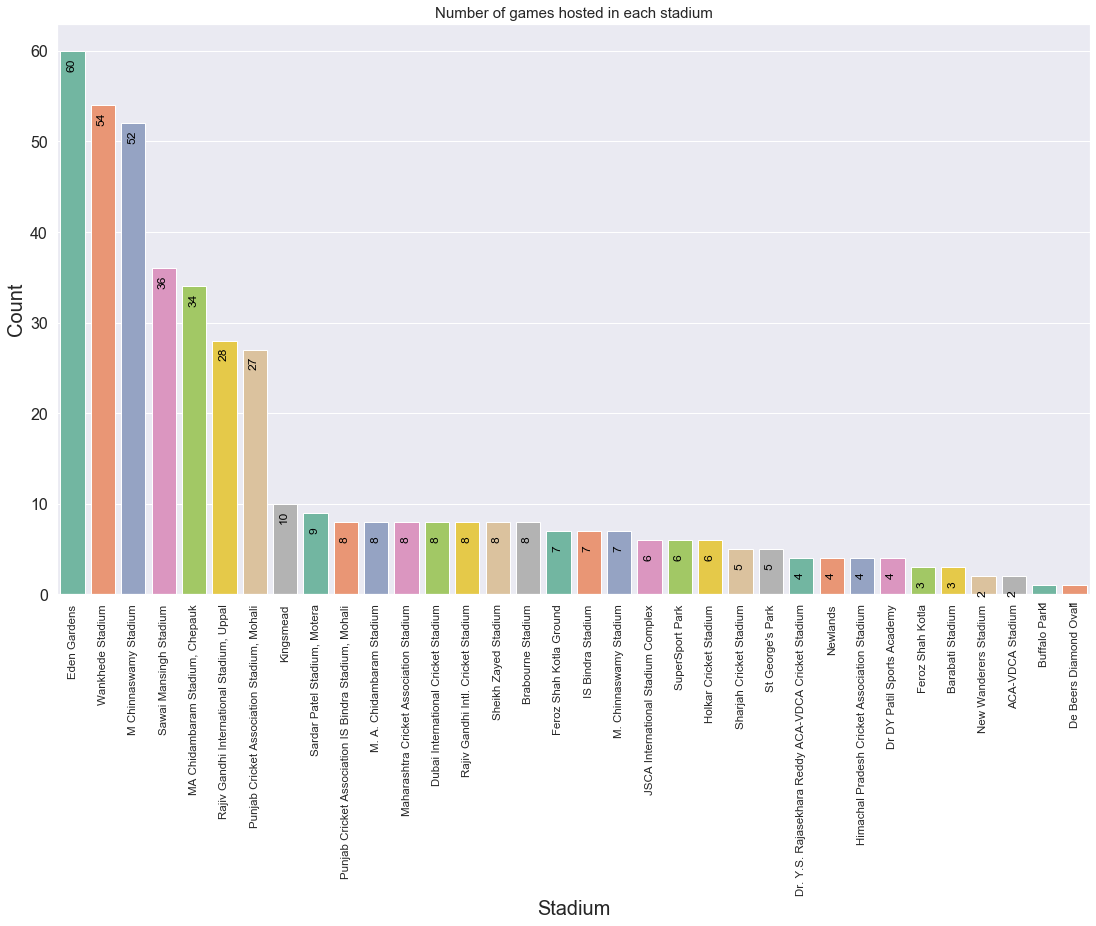

In [22]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.countplot(ipl['venue'],order=ipl['venue'].value_counts().index,palette='Set2')
plt.xticks(rotation=90,fontsize=11.5)
plt.yticks(fontsize=16)
plt.xlabel('Stadium',fontsize=20)
plt.ylabel('Count',fontsize=20)
plt.title('Number of games hosted in each stadium',fontsize=15)
count=0
cities=pd.DataFrame(ipl['venue'].value_counts())
cities['names']=ipl['venue'].value_counts().index
for i in cities['venue']:
    plt.text(count-0.2,i-2,str(i),rotation=90,color='black',size=12)
    count+=1
plt.show() 

# MI vs CSK

In [23]:
micsk = ipl[np.logical_or(np.logical_and(ipl['team1']=='Mumbai Indians',ipl['team2']=='Chennai Super Kings'),np.logical_and(ipl['team2']=='Mumbai Indians',ipl['team1']=='Chennai Super Kings'))]

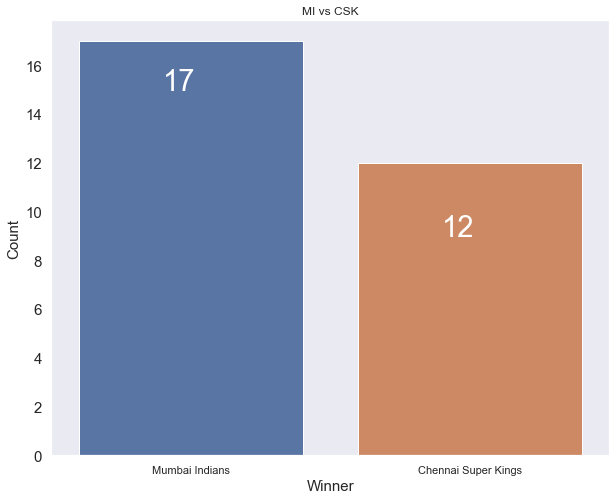

In [24]:
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(10,8)
sns.countplot(micsk['winner'],order=micsk['winner'].value_counts().index)
plt.text(-0.1,15,str(micsk['winner'].value_counts()['Mumbai Indians']),size=29,color='white')
plt.text(0.9,9,str(micsk['winner'].value_counts()['Chennai Super Kings']),size=29,color='white')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=15)
plt.title('MI vs CSK')
plt.show()

### Best performer

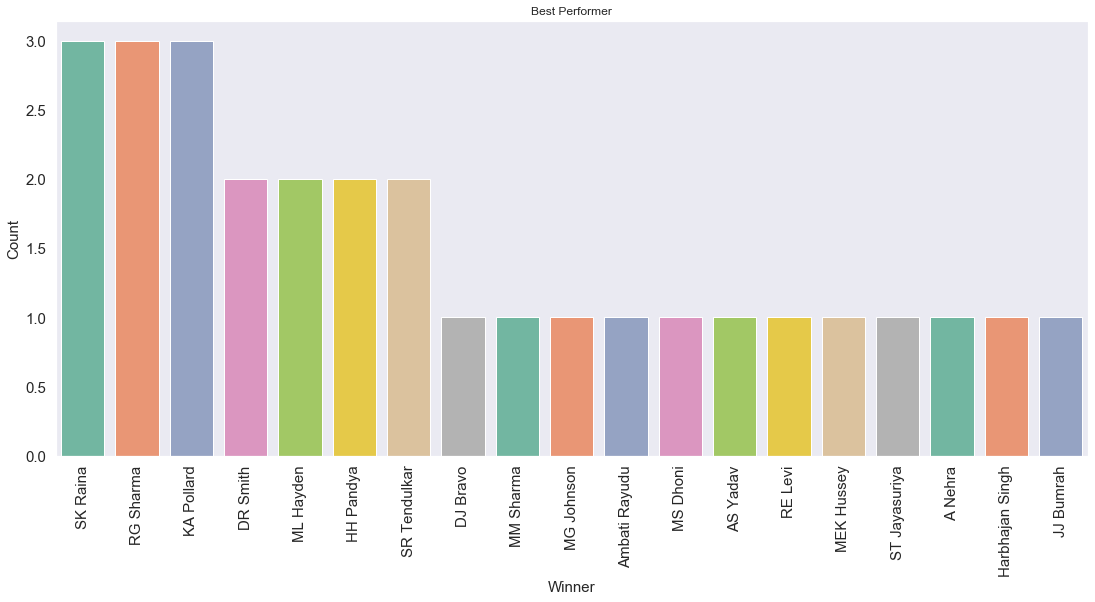

In [25]:
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(micsk['player_of_match'],order=micsk['player_of_match'].value_counts().index,palette='Set2')
plt.xlabel('Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.title('Best Performer')
plt.show()

### Decisions

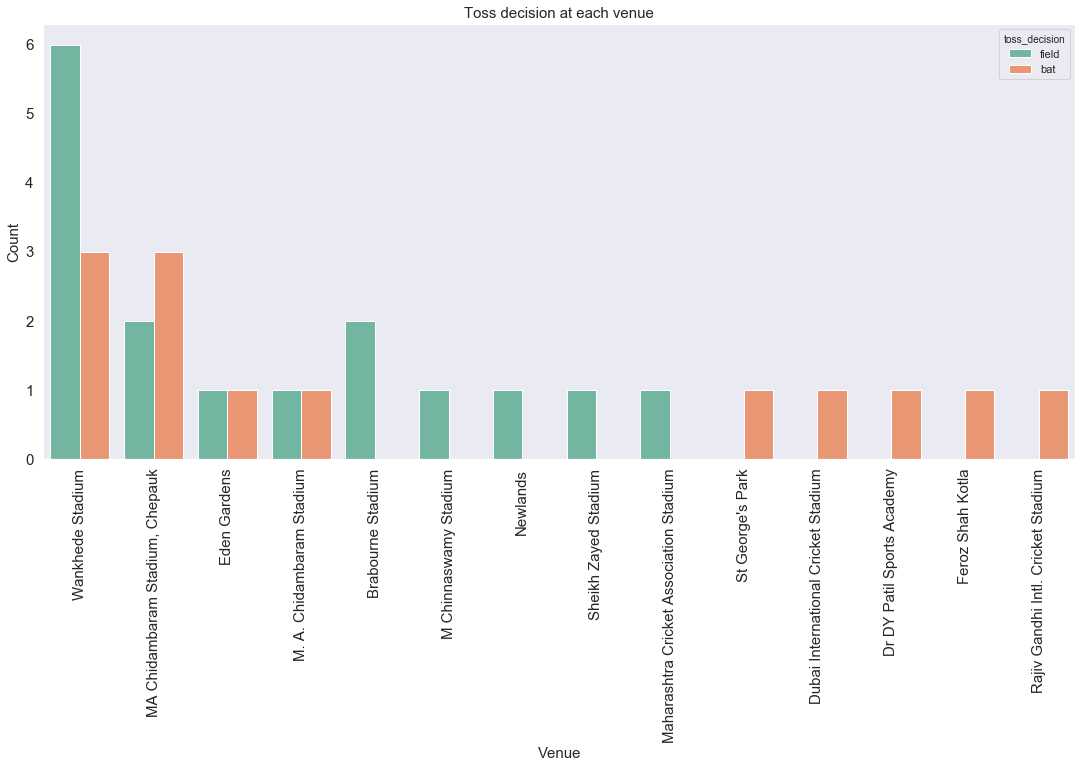

In [26]:
sns.set(style='dark')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(micsk['venue'],order=micsk['venue'].value_counts().index,palette='Set2',hue=ipl['toss_decision'])
plt.xlabel('Venue',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15,rotation=90)
plt.title('Toss decision at each venue',size=15)
plt.show()

### Decision for winning the toss

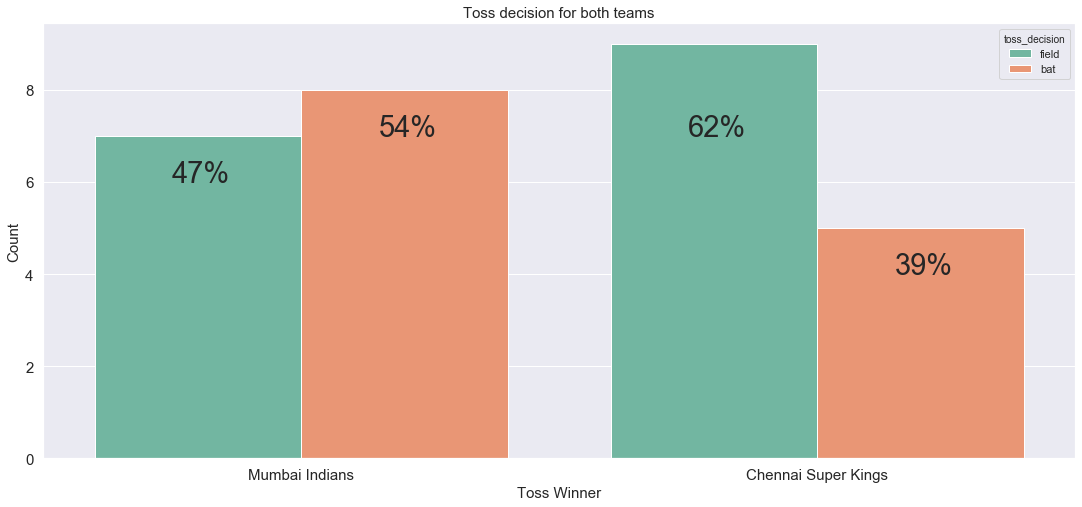

In [27]:
sns.set(style='darkgrid')
fig=plt.gcf()
fig.set_size_inches(18.5,8)
sns.countplot(micsk['toss_winner'],order=micsk['toss_winner'].value_counts().index,palette='Set2',hue=ipl['toss_decision'])
plt.xlabel('Toss Winner',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.yticks(fontsize=15)
plt.xticks(fontsize=15)
plt.text(-0.25,6,str(int((7/15)*100)+1)+'%',fontsize=29)
plt.text(0.15,7,str(int((8/15)*100)+1)+'%',fontsize=29)
plt.text(0.75,7,str(int((8/13)*100)+1)+'%',fontsize=29)
plt.text(1.15,4,str(int((5/13)*100)+1)+'%',fontsize=29)
plt.title('Toss decision for both teams',size=15)
plt.show()

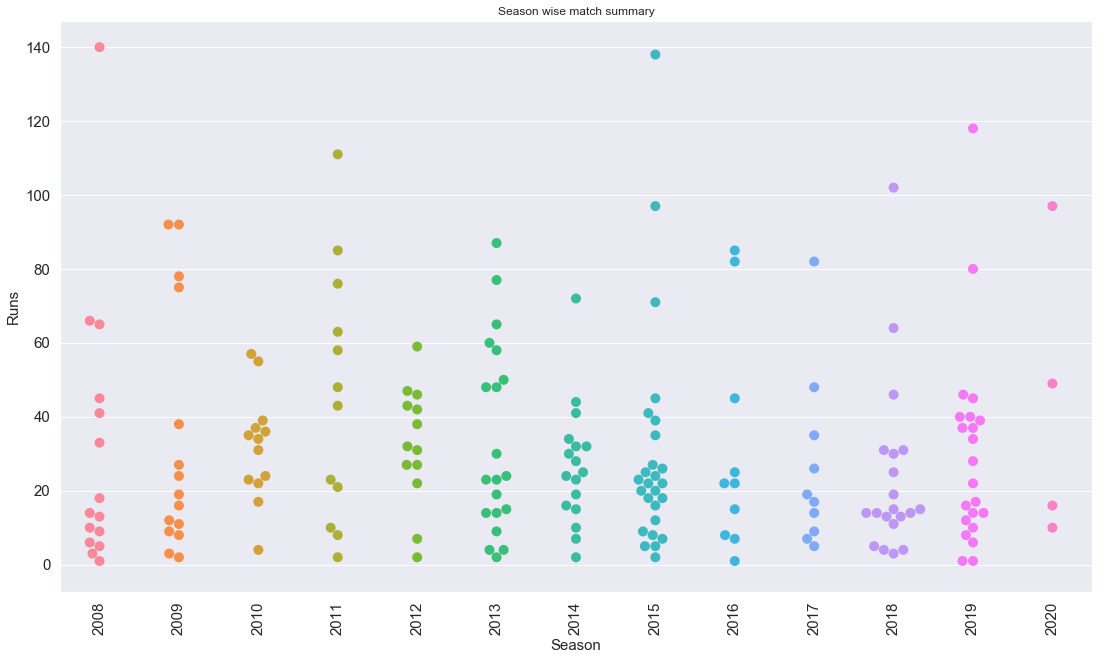

In [28]:
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
sns.swarmplot(ipl['season'],ipl[ipl['win_by_runs']!=0]['win_by_runs'],s=10)
plt.xticks(rotation=90,size=15)
plt.yticks(size=15)
plt.xlabel('Season',size=15)
plt.ylabel('Runs',size=15)
plt.title('Season wise match summary')
plt.show()

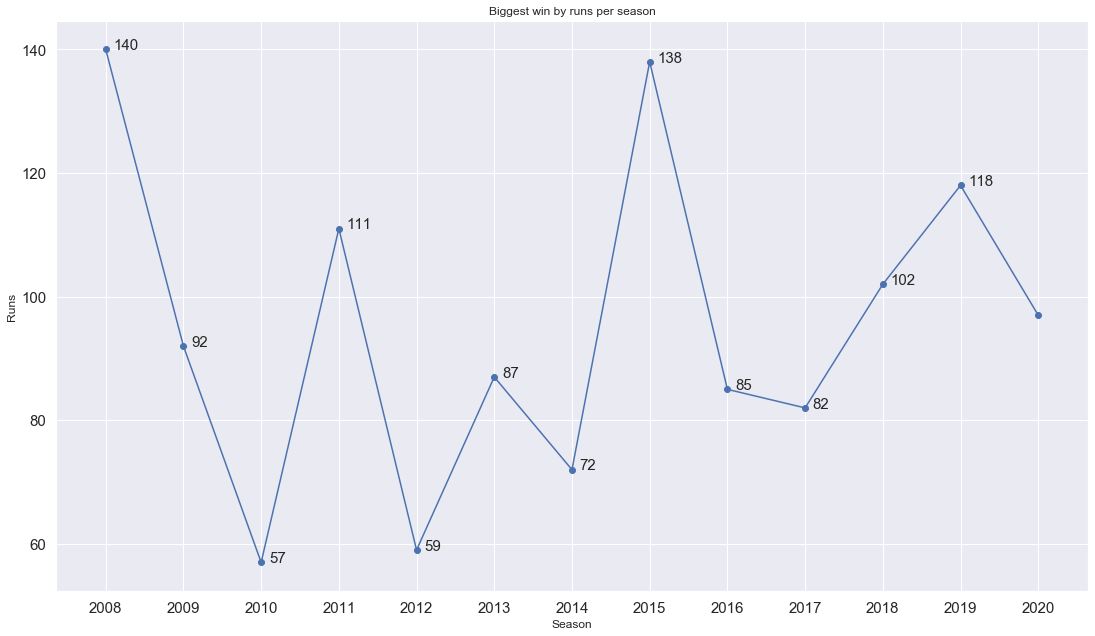

In [29]:
s=2008
season=[]
win_by_runs_max=[]
while s<2021:
    season.append(s)
    win_by_runs_max.append(ipl[ipl['season']==s]['win_by_runs'].max())
    s+=1
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.plot(season,win_by_runs_max)
plt.scatter(season,win_by_runs_max)
count=0
while count<12:
    plt.text(season[count]+0.1,win_by_runs_max[count],str(win_by_runs_max[count]),size=15)
    count+=1
plt.yticks(size=15)
plt.xticks(range(2008,2021),size=15)
plt.xlabel('Season')
plt.ylabel('Runs')
plt.title('Biggest win by runs per season')
plt.show()

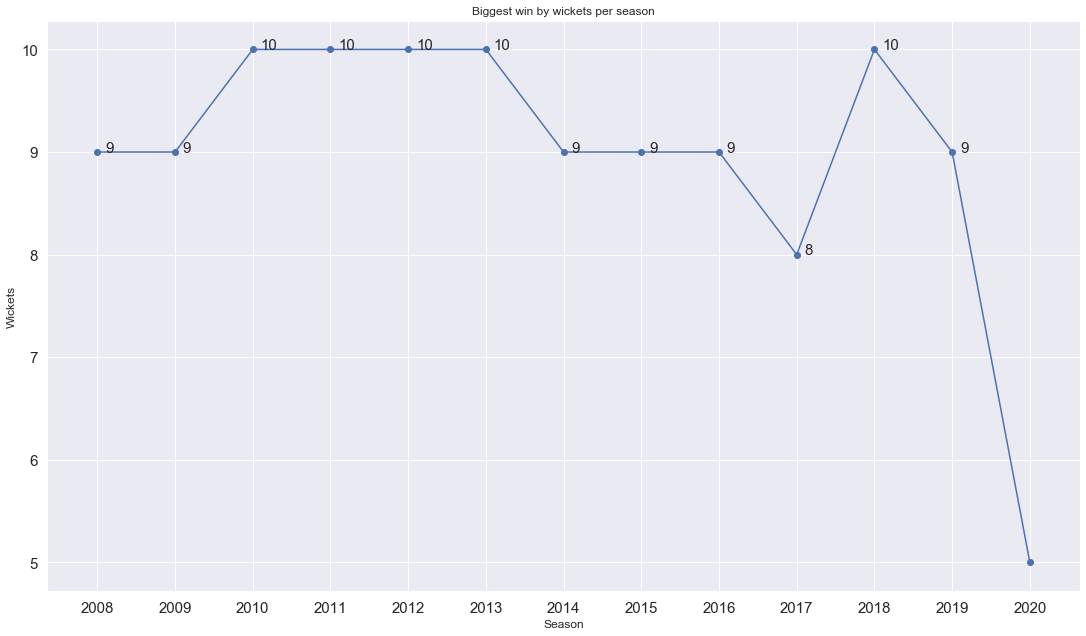

In [30]:
s=2008
season=[]
win_by_wickets_max=[]
while s<2021:
    season.append(s)
    win_by_wickets_max.append(ipl[ipl['season']==s]['win_by_wickets'].max())
    s+=1
fig=plt.gcf()
fig.set_size_inches(18.5,10.5)
plt.plot(season,win_by_wickets_max)
plt.scatter(season,win_by_wickets_max)
count=0
while count<12:
    plt.text(season[count]+0.1,win_by_wickets_max[count],str(win_by_wickets_max[count]),size=15)
    count+=1
plt.yticks(size=15)
plt.xticks(range(2008,2021),size=15)
plt.xlabel('Season')
plt.ylabel('Wickets')
plt.title('Biggest win by wickets per season')
plt.show()

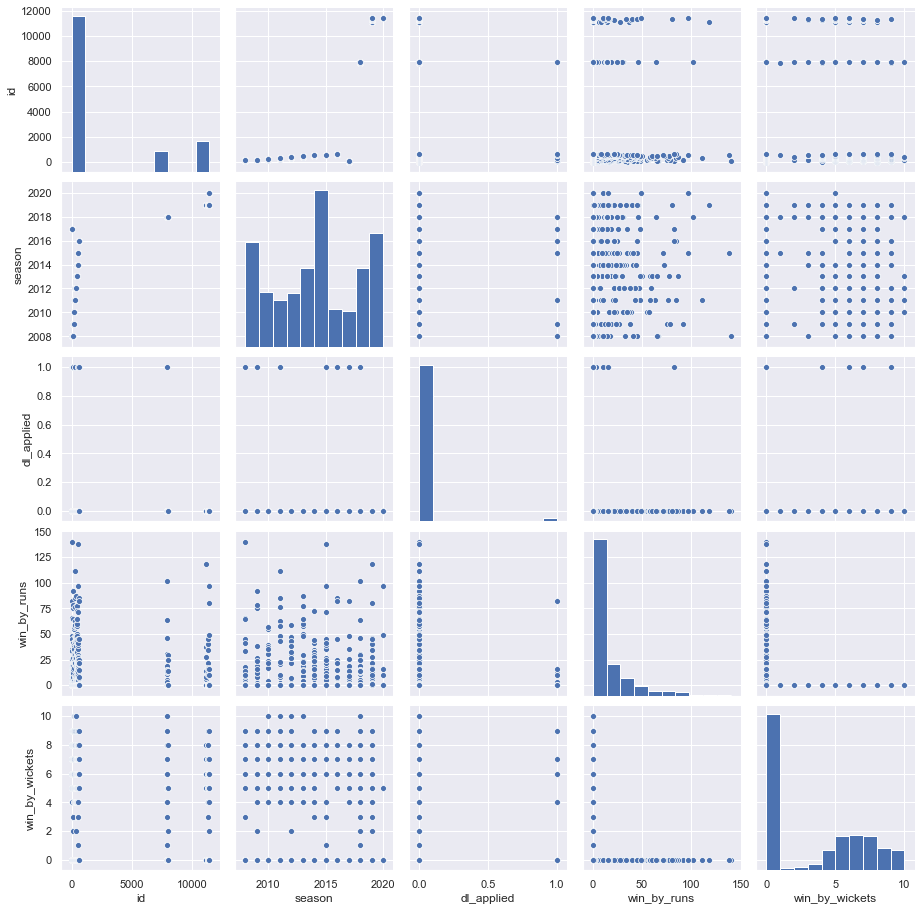

In [31]:
sns.pairplot(ipl)

In [32]:
ipl.corr()

,id,season,dl_applied,win_by_runs,win_by_wickets
id,1.000000,0.768864,-0.060646,-0.047880,-0.023807
season,0.768864,1.000000,-0.048862,-0.053121,-0.050293
dl_applied,-0.060646,-0.048862,1.000000,-0.003049,-0.030813
win_by_runs,-0.047880,-0.053121,-0.003049,1.000000,-0.572316
win_by_wickets,-0.023807,-0.050293,-0.030813,-0.572316,1.000000


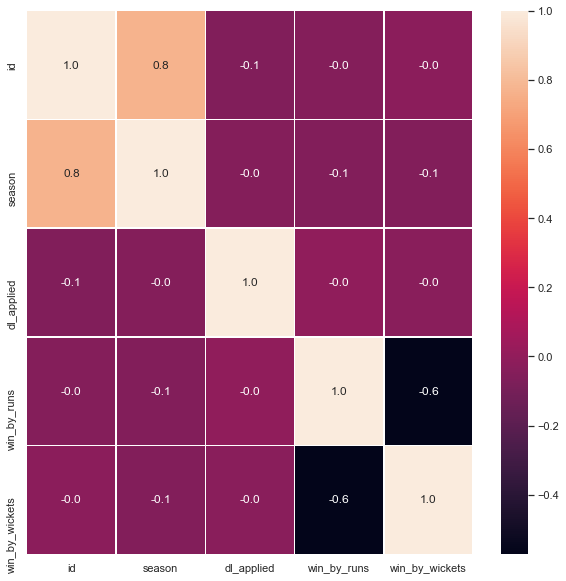

In [33]:
f, ax = plt.subplots(figsize=(10,10))
sns.heatmap(ipl.corr(), annot = True, linewidths = 0.4, fmt = '.1f', ax=ax)
plt.show()

In [34]:
def annotation_plot(ax,w,h):                                    # function to add data to plot
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    for p in ax.patches:
        ax.annotate('{0:.1f}'.format(p.get_height()), (p.get_x()+w, p.get_height()+h))

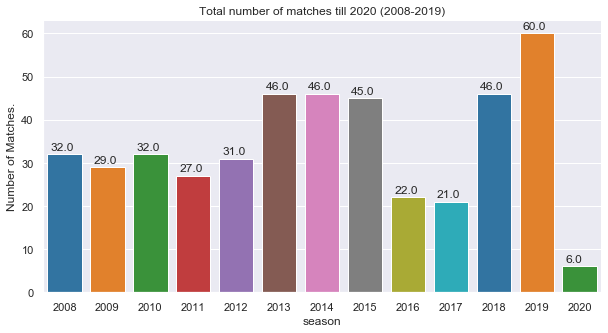

In [35]:
total_matches = ipl.groupby('season')['id'].count()
plt.figure(figsize=(10,5))
ax = sns.countplot("season", data = ipl, palette ='tab10')
plt.title('Total number of matches till 2020 (2008-2019)')
plt.ylabel('Number of Matches.')
annotation_plot(ax,0.08,1)
plt.show()